## Now, let's construct the same model but scalable

In [83]:
from statistics import mean
import numpy as np

def expected_value(stock_return_vec):
    return mean(stock_return_vec)

# takes in a vector of the overall share of each stock in your portfolio,
# and a list of lists with the returns of each stock
#the lengths of these vectors should be equivalent
def expected_return_port(weights, stock_vecs):
    means = []
    for i in range(len(stock_vecs)):
        means.append(mean(stock_vecs[i]))
    return np.dot(means,weights)


### Let's test these functions. I have 3 stocks, A, B, and C. Over 5 days their retruns are (0,7.2,7.1,-5,11.5), (-1.4,4.5,7.1,3.2,2.2), and (7.2,1.2,1.2,4,12.9) respectively. 

In [84]:
ret_A = [0,7.2,7.1,-5,11.5]
ret_B = [-1.4,-4.5,7.1,3.2,2.2]
ret_C = [7.2,1.2,1.2,4,12.9]

### Their expected values are:

In [85]:
exp_A = expected_value(ret_A) 
exp_B = expected_value(ret_B) 
exp_C = expected_value(ret_C)

print(exp_A)
print(exp_B)
print(exp_C)

4.16
1.32
5.3



### Say I invest 20% of my money in A, 40% of my money in B and 40% of my money in C. Then, the expected return on my portfoilio would be:

In [86]:
portfolio = [ret_A, ret_B, ret_C]
shares = [.2,.4,.4]
print(expected_return_port(shares, portfolio))

3.48


### So my expected retrun on this portfolio would be 4.2%. Now let's calculate the risk of the portflio, measured as the standard deviation of the expected return of the portfolio

In [87]:
from math import sqrt

def risk_port(weights, stock_vecs):
    return sqrt(np.dot(np.dot(np.cov(stock_vecs),weights),weights))

In [88]:
### The standard deviations of each individual asset are:

### And the risk of the portfolio I constructed above with stocks A, B, and C would be:

In [89]:
print(risk_port(shares, portfolio))

3.1781441125285683


### Our goal is to have a portfolio risk smaller that of the individual assets, which we acheived here. We can create an efficient frontier by taking random weights and plotting the expected return and standard deviations

In [90]:
from random import random

def randWeights(size):
    list = []
    total = 0
    for i in range(size):
        num = random()
        list.append(num)
        total += num
    for i in range(size):
        list[i] = list[i]/total
    return list

In [91]:
print(randWeights(3))

[0.3135250670646368, 0.3396756111225049, 0.3467993218128584]


In [92]:
import matplotlib.pyplot as plt
def makeFrontier(stock_vecs):
    returns = []
    stdev = []
    w = []
    for i in range(6000):
        weights = randWeights(len(stock_vecs))
        returns.append(expected_return_port(weights, stock_vecs))
        stdev.append(risk_port(weights, stock_vecs))
        w.append(weights)
    plt.scatter(stdev, returns)
    plt.title("Efficient Frontier")
    plt.xlabel("risk")
    plt.ylabel("return")
    plt.show()

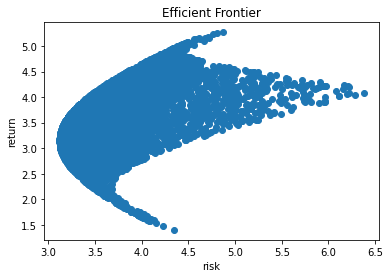

In [93]:
makeFrontier(portfolio)

### Now, we can extend the model to include the captial market line (CML) defined as: 
$$E(R_p) = R_f + \frac{\sigma_p (E(R_m)-R_f)}{\sigma_m}$$ where $R_f$ is the risk free rate of return,$E(R_m)$ is the expected return of the market, and $\sigma_m$ is the standard deviation of the market. So the CML can be constructed as follows.

In [100]:
def port_ret_cml(risk_free,market_vec, stock_vecs, weights):
    val = risk_free + (risk_port(weights, stock_vecs)*(expected_value(market_vec)-risk_free))/(np.var(market_vec))
    return val

### Now, lets say the market return is [.1,.5,.6,1.3,-.1], and the risk free rate is .5 (these are just random numbers) lets get the cml.

In [106]:
market_ret = [.1,.5,.6,1.3,-.1]
print(port_ret_cml(.1,market_ret, portfolio, shares))

5.269926210448869


In [107]:
def makeCML(stock_vecs, risk_free,market_vec):
    returns = []
    stdev = []
    w = []
    for i in range(6000):
        weights = randWeights(len(stock_vecs))
        returns.append(port_ret_cml(risk_free,market_vec, stock_vecs, weights))
        stdev.append(risk_port(weights, stock_vecs))
        w.append(weights)
    plt.scatter(stdev, returns)
    plt.xlabel("risk")
    plt.ylabel("return")
    plt.show()

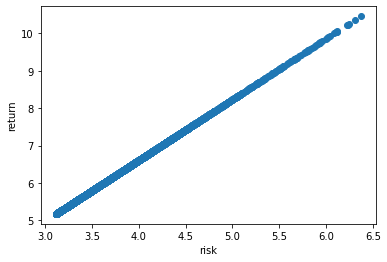

In [108]:
makeCML(portfolio, .1 ,market_ret)

In [111]:
def makeCML_ef(stock_vecs, risk_free,market_vec):
    returns_1 = []
    stdev_1 = []
    w_1 = []
    for i in range(6000):
        weights = randWeights(len(stock_vecs))
        returns_1.append(port_ret_cml(risk_free,market_vec, stock_vecs, weights))
        stdev_1.append(risk_port(weights, stock_vecs))
        w_1.append(weights)
    returns = []
    stdev = []
    w = []
    for i in range(6000):
        weights = randWeights(len(stock_vecs))
        returns.append(expected_return_port(weights, stock_vecs))
        stdev.append(risk_port(weights, stock_vecs))
        w.append(weights)
    plt.scatter(stdev_1, returns_1)
    plt.scatter(stdev, returns)
    plt.title("Efficient Frontier + CML")
    plt.xlabel("risk")
    plt.ylabel("return")
    plt.show()

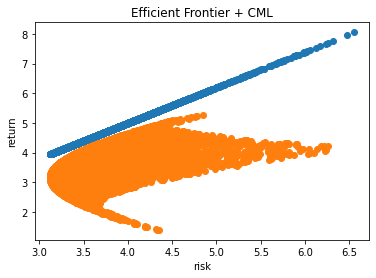

In [115]:
makeCML_ef(portfolio, .2 ,market_ret)